In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.style.use('ggplot')
pd.set_option('display.max_rows', 1000)


ad = pd.read_csv('AllDeliveries.csv')
am = pd.read_csv('TableOfMatches.csv')
ap = pd.read_csv('AllPlayers.csv')
st = pd.read_stata('ScoreTallies.dta')
ad = ad.drop('Unnamed: 0',axis=1)
am = am.drop('Unnamed: 0',axis=1)
ap = ap.drop('Unnamed: 0.1',axis=1)

In [16]:
NOutcomes = 8 #W 0 1 2 3 4 5 6
NRunRates = 21 #0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
NPlayers = 11 #obvious

#example:
ProbsVector = (1/8)*np.ones((NOutcomes,NRunRates))

In [17]:
class Player:
    def __init__(self,ProbArray):
        self.ProbArray = ProbArray;
        self.Outcomes = [0,1,2,3,4,5,6,np.nan];
        self.LastInnings = [];
        
    def ProbVector(self,runrate):
        return self.ProbArray[:,runrate]
    
    def RunDelivery(self,runrate):
        return self.Outcomes[np.argmax(self.ProbArray[:,runrate].cumsum() > np.random.random())]
    
    def RunTillWicket(self,runrate):
        a = self.RunDelivery(runrate)
        l = []; n=0;
        while ~(np.isnan(a)) & (n<120):
            l.append(a);
            a = self.RunDelivery(runrate); n+=1;
        l.append(a);
        self.LastInnings = np.array(l);
        return l
    
def RunDelivery(ProbsVector):
    ProbsVector = [0,1,2,3,4,5,6,np.nan]
    return ProbsVector[np.argmax(ProbVector.cumsum() > np.random.random())]

In [18]:
ProbArray = np.zeros((NOutcomes,NRunRates))
ProbArray[:,2]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
asad = Player(ProbsVector)

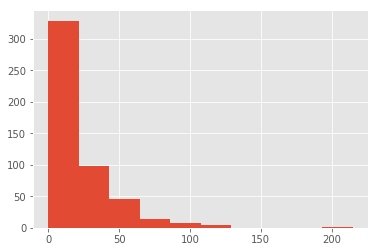

In [20]:
plt.hist(np.array([np.nansum(asad.RunTillWicket(3)) for a in range(500)]))
plt.show()

In [21]:
def RunMatch(rrs,Players):
    Batsmen = [0,1];Next = 2; Innings=np.array([]);
    Scores = [0]*len(Players);
    for i in range(120):
        PlayerBatting = Players[Batsmen[0]];
        delOutcome = PlayerBatting.RunDelivery(rrs[Batsmen[0]]);
        if np.isnan(delOutcome):
            Batsmen[0] = Next;
            Next = Next + 1;
        else:
            Scores[Batsmen[0]] += delOutcome;
        if np.isin(delOutcome,[1,3,5]):
            Batsmen = [Batsmen[1],Batsmen[0]];
        Innings = np.append(Innings,delOutcome)
        if Next > 11:
            break
    return Innings,Scores

def RunMatchOptimized(rrs,Players):
    Batsmen = [0,1];Next = 2; runs=0;
    for i in range(120):
        PlayerBatting = Players[Batsmen[0]];
        delOutcome = PlayerBatting.RunDelivery(rrs[Batsmen[0]]);
        if np.isnan(delOutcome):
            Batsmen[0] = Next;
            Next = Next + 1;
        elif np.isin(delOutcome,[1,3,5]):
            Batsmen = [Batsmen[1],Batsmen[0]];
            runs = runs+delOutcome;
        else:
            runs = runs+delOutcome;
        if Next > 11:
            break
    return runs

In [22]:
class Strategy:
    def __init__(self,RRR=[],):
        self.Rates = RRR
    
    def BatsmanStrat(Batsman,RRR,Over):
        return rrr[Batsman]

In [23]:
def asad(a):
    return a

In [24]:
rrs = [3,4,4,5,6,2,3,4,5,6,4];
Players = [Player(ProbsVector) for a in range(11)];
RunMatch(rrs,Players)

(array([ 4.,  3.,  4.,  4.,  1.,  2.,  0.,  3.,  1.,  0.,  1., nan,  1.,
         6., nan,  3.,  5., nan,  2.,  4.,  1.,  4.,  5.,  6.,  6.,  2.,
         6.,  5.,  6., nan,  0., nan, nan,  0.,  5., nan,  2.,  4., nan,
         3.,  6.,  6.,  6.,  0.,  2.,  3.,  2.,  5.,  0.,  2.,  6.,  1.,
         1.,  4.,  1.,  1.,  0.,  5.,  0.,  4.,  2., nan,  5.,  1.,  0.,
         5.,  5.,  2.,  1.,  2.,  6.,  2.,  6.,  0.,  3.,  6.,  3., nan]),
 [19, 10, 21, 3, 32, 0, 0, 72, 6, 18, 22])

In [25]:
final = pd.read_stata('merged.dta')

In [26]:
#Turn on or off depending on dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(final,test_size=0.8)
final = train

In [27]:
final['dels'] = final.dots_ + final.ones_ + final.twos_ + final.threes_ + final.fours_ + final.fives_ + final.sixes_ + final.out

In [46]:
ta = final[['batsman','rrr','dots_','ones_','twos_','threes_','fours_','fives_','sixes_','out','dels']]

In [47]:
tt = ta.groupby('rrr')['dots_','ones_','twos_','threes_','fours_','fives_','sixes_','out','dels'].sum().reset_index()

In [48]:
tt.dots_ = tt.dots_ / tt.dels;
tt.out = tt.out / tt.dels;
tt.ones_ = tt.ones_ / tt.dels;
tt.twos_ = tt.twos_ / tt.dels;
tt.threes_ = tt.threes_ / tt.dels;
tt.fours_ = tt.fours_ / tt.dels;
tt.fives_ = tt.fives_ / tt.dels;
tt.sixes_ = tt.sixes_/ tt.dels;

In [49]:
tt.head(15)

,rrr,dots_,ones_,twos_,threes_,fours_,fives_,sixes_,out,dels
0,0.0,0.289855,0.297101,0.057971,0.007246,0.195652,0.000000,0.137681,0.014493,138.0
1,1.0,0.354167,0.354167,0.048611,0.020833,0.138889,0.000000,0.055556,0.027778,144.0
2,2.0,0.375000,0.379310,0.064655,0.000000,0.116379,0.000000,0.017241,0.047414,232.0
3,3.0,0.394009,0.327189,0.073733,0.011521,0.089862,0.000000,0.057604,0.046083,434.0
4,4.0,0.420128,0.365815,0.060703,0.003195,0.099042,0.000000,0.027157,0.023962,626.0
5,5.0,0.439828,0.310888,0.060888,0.006447,0.113897,0.000000,0.027221,0.040831,1396.0
6,6.0,0.412484,0.339768,0.067568,0.001931,0.110682,0.000644,0.027671,0.039254,1554.0
7,7.0,0.422453,0.339495,0.058161,0.004509,0.104148,0.000000,0.032913,0.038323,2218.0
8,8.0,0.411694,0.355609,0.058473,0.006563,0.100835,0.000000,0.026850,0.039976,1676.0
9,9.0,0.420041,0.321208,0.070007,0.002745,0.102951,0.000000,0.034317,0.048730,1457.0


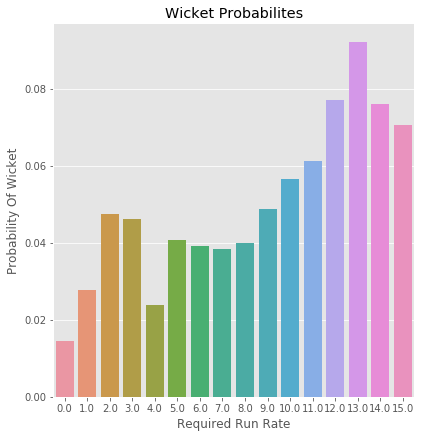

In [50]:
tta = tt.rename(index=str, columns={"rrr": "Required Run Rate", "out": "Probability Of Wicket"})
ax = sns.factorplot(x="Required Run Rate",y="Probability Of Wicket",data=tta[tta["Required Run Rate"].between(0,15)],kind='bar',size=6)
plt.title('Wicket Probabilites')
plt.show()

In [51]:
AvgProbVector = tt[tt.rrr.between(0,20)].drop(['rrr','dels'],axis=1).values

In [52]:
tt['StrikeRate'] = (tt.ones_ + 2*tt.twos_ + 3*tt.threes_ + 4*tt.fours_ + 5*tt.fives_ + 6*tt.sixes_)*100

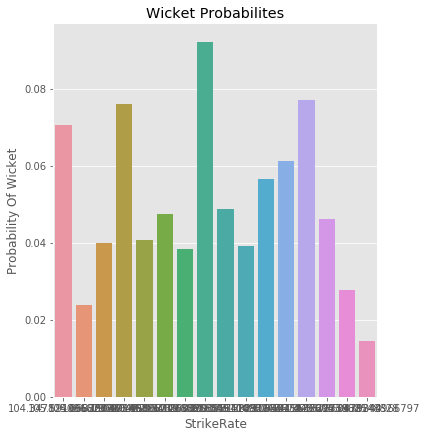

In [54]:
tta = tt.rename(index=str, columns={"rrr": "Required Run Rate", "out": "Probability Of Wicket"})
ax = sns.factorplot(y="Probability Of Wicket",x="StrikeRate",data=tta[tta["Required Run Rate"].between(0,15)],kind='bar',size=6)
plt.title('Wicket Probabilites')
plt.show()

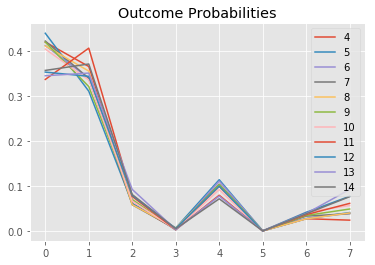

In [55]:
ax = plt.plot(AvgProbVector[4:15,:].transpose())
plt.title('Outcome Probabilities')
plt.legend(np.arange(4,15))
plt.show()

In [56]:
tk = tt[tt.rrr.between(0,36)].groupby('rrr')['dots_','ones_','twos_','threes_','fours_','fives_','sixes_','out','dels'].sum().reset_index()

In [57]:
p = tk.drop(['rrr','dels'],axis=1).values

In [58]:
p = tk.drop(['rrr','dels'],axis=1).values

In [59]:
aaa = ta[ta.batsman == 'A Bagai']

In [60]:
Nprev = 10; NOutcome = 8;
x = np.zeros_like(p);
th = p;
for i,row in aaa.iterrows():
    r = int(row['rrr']);
    x[r,:] = row[['dots_','ones_','twos_','threes_','fours_','fives_','sixes_','out']].values
    th[r,:] = (Nprev*p[r,:] + x[r,:]-1)/(Nprev + row['dels']-1);

In [61]:
plays = {}; Nprev = 10; NOutcome = 8;
for j,aaa in ta.groupby('batsman'):
    x = np.zeros_like(p);
    th = p.copy();
    for i,row in aaa.iterrows():
        r = int(row['rrr']);
        if (r < 37) & (r > 0):
            x[r,:] = row[['dots_','ones_','twos_','threes_','fours_','fives_','sixes_','out']].values
            th[r,:] = (Nprev*p[r,:] + x[r,:])/(Nprev + int(row['dels']));
    plays[aaa['batsman'].iloc[0]] = Player(th.transpose())

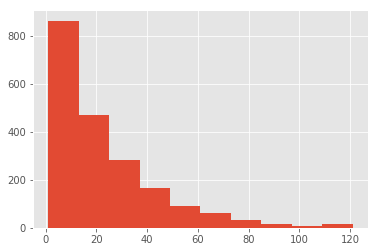

In [64]:
rrr=3
a = np.array([len(plays['Mohammad Amir'].RunTillWicket(rrr)) for i in range(2000)])
plt.hist(a); plt.show();

In [65]:
class Match:
    def __init__(self,PlayerNames):
        self.PlayerNames = PlayerNames;
        self.Target = 0;
        self.Distribution = [];
        self.Rates = [5]*11;
        self.Players = [plays[Playername] for Playername in PlayerNames];
        
    def SetTarget(self,Target):
        self.Target = Target;
        
    def AssignRates(self,rrs):
        self.Rates = rrs;
        
    def RunMonteCarlo(self,NTrials,Draw=False):
        self.Distribution = np.array([RunMatchOptimized(self.Rates,self.Players) for i in range(NTrials)]);
        if Draw:
            plt.hist(self.Distribution,bins=15); 
            plt.xlabel('Runs'); plt.ylabel('Frequency');
            #p = WinProb(self.Target)
            plt.title('Distribution Of Scores',fontsize=18)
            plt.show();
        return self.Distribution
        
    def WinProb(self,Target):
        p = (self.Distribution > Target).sum()/len(self.Distribution);
        return p

In [79]:
#PlayerNames = ['V Kohli','Babar Azam','Mohammad Hafeez','Younis Khan','Misbah-ul-Haq','Shahid Afridi','Sarfraz Ahmed','Imad Wasim','Umar Gul','Junaid Khan','Saeed Ajmal'];
#Choose A Team
India = ['S Dhawan','RG Sharma','V Kohli','Yuvraj Singh','MS Dhoni','SK Raina','RA Jadeja','R Ashwin','JJ Bumrah','Harbhajan Singh','A Nehra']
Match1 = Match(India);
Match1.Rates = [8,5,5,5,5,5,8,8,8,8,8];
Match1.RunMonteCarlo(400,Draw=False);
Match1.WinProb(120)

0.2925

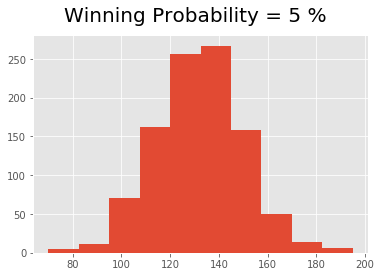

In [81]:
PlayerNames = ['S Dhawan','RG Sharma','V Kohli','Yuvraj Singh','MS Dhoni','SK Raina','RA Jadeja','R Ashwin','JJ Bumrah','Harbhajan Singh','A Nehra']

NTrials = 1000; Target = 160;
Players = [plays[Playername] for Playername in PlayerNames];
rrs = [5]*11;

WinDist = np.array([RunMatchOptimized(rrs,Players) for i in range(NTrials)]);

probwin = (WinDist > Target).sum()/NTrials

plt.hist(WinDist,bins=10);
plt.suptitle("Winning Probability = " + str(int(probwin*100)) + " %",fontsize=20)
plt.show()

In [579]:
ad[(ad.BattingTeam == 'India')].Batsman.unique()

array(['KL Rahul', 'AT Rayudu', 'Mandeep Singh', 'MK Pandey', 'KM Jadhav',
       'MS Dhoni', 'AR Patel', 'R Dhawan', 'DS Kulkarni', 'V Kohli',
       'SK Raina', 'Yuvraj Singh', 'HH Pandya', 'Parvez Rasool', 'RR Pant',
       'RG Sharma', 'AM Rahane', 'S Dhawan', 'KD Karthik', 'RA Jadeja',
       'R Ashwin', 'V Sehwag', 'SR Tendulkar', 'D Mongia', 'G Gambhir',
       'RV Uthappa', 'IK Pathan', 'Harbhajan Singh', 'AB Agarkar',
       'S Sreesanth', 'RP Singh', 'YK Pathan', 'P Kumar', 'I Sharma',
       'Z Khan', 'M Vijay', 'A Nehra', 'AB Dinda', 'PP Ojha', 'NV Ojha',
       'PA Patel', 'R Dravid', 'R Vinay Kumar', 'MM Patel', 'S Badrinath',
       'MK Tiwary', 'PP Chawla', 'B Kumar', 'STR Binny', 'SV Samson',
       'MM Sharma', 'Sandeep Sharma', 'JJ Bumrah'], dtype=object)

In [589]:
ad[ad.Batsman.str.contains('Ashwin')].Batsman.unique()

array(['R Ashwin'], dtype=object)

In [590]:
India = ['S Dhawan','RG Sharma','V Kohli','Yuvraj Singh','MS Dhoni','SK Raina','RA Jadeja','R Ashwin','JJ Bumrah','B Kumar','A Nehra']

In [ ]:
act = (ad.groupby('MatchId')[['Target','Winner','BattingTeam','BowlingTeam','BattingTeamWon']].first().reset_index())
actind = act[(act.BowlingTeam == 'India')][['Target','BattingTeamWon']]

actind.Target = pd.cut(actind.Target, 10, retbins=True)[0]
actind.groupby('Target').BattingTeamWon.sum()
#actind.groupby('Target').BattingTeamWon.count()

In [ ]:
prs = [1,1,7/9,5/6,2/3,3/7,0,1,1/2,0];
x = [81,98,114,131,147,164,180,196,213,229];
plt.bar(x,prs,width=10);
plt.show()

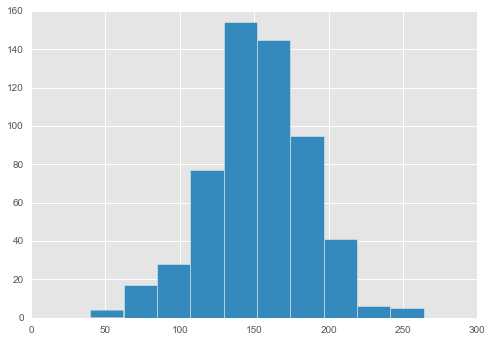

In [6]:
plt.hist(ad.groupby('MatchId').first().reset_index().Target.dropna().values);
plt.show()

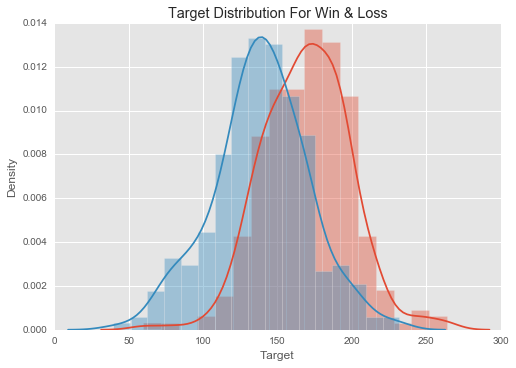

In [84]:
sss = ad.groupby('MatchId').first().reset_index()
ax = sns.distplot(sss[sss.BattingTeamWon == True].Target)
sns.distplot(sss[sss.BattingTeamWon == False].dropna().Target)
ax.set_title("Target Distribution For Win & Loss")
ax.set_ylabel("Density")
plt.show()

In [83]:
sss[sss.BattingTeamWon == False].Target.mean()

138.73578595317727

In [127]:
rates = [3,4,5,6,7,8,9,10,11,12,13,14];
indices = [(i,j) for j in rates for i in rates]
import random
a = random.choice(indices)
indices.remove(a)

In [130]:
sss.Target.mean()

153.29195804195805